In [1]:
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import FGSM
from foolbox.criteria import ConfidentMisclassification, TargetClass

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.utils import plot_model

# from keras.datasets import cifar10
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()


%matplotlib inline 
%load_ext autoreload
%autoreload 2

Importing things inside foolbox


Using TensorFlow backend.


In [2]:
keras.backend.set_learning_phase(0)
model = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = KerasModel(model, bounds=(0,255), preprocessing=preprocessing)
# criterion = ConfidentMisclassification(0.7)
criterion = TargetClass(278)
attack = FGSM(model=fmodel, criterion=criterion)

Shape of predictions is (None, 1000)
Number of classes: 1000
Predictions_shape: (?, 1000)
label_input: Tensor("Placeholder_320:0", shape=(1,), dtype=float32)
predictions: Tensor("fc1000/BiasAdd:0", shape=(?, 1000), dtype=float32)


In [3]:
print(model.output.shape)

(?, 1000)


In [4]:
predictions = model.output
print(predictions)
print("============================")
predictions = model.output.op.inputs
print(predictions)
print("============================")
for inp in predictions:
    print(inp)
# predictions = predictions[0][0][0]
# print(predictions)
# print(K.expand_dims(predictions, axis=0))

Tensor("fc1000/Softmax:0", shape=(?, 1000), dtype=float32)
Tensor("fc1000/BiasAdd:0", shape=(?, 1000), dtype=float32)


(224, 224, 3)
255
0
282


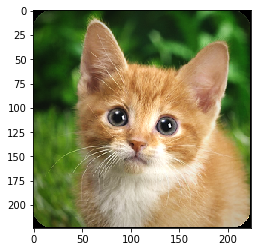

In [5]:
image, label = foolbox.utils.imagenet_example()
# image = x_test[0]
# label = y_test[0]
image = image.astype(int)
print(image.shape)
print(np.max(image))
print(np.min(image))
plt.imshow(image)
print(label)

In [6]:
image_in = np.expand_dims(image, axis=0)
image_in = preprocess_input(image_in)
real_pred = model.predict(image_in)
print(real_pred.shape)
print(np.argmax(real_pred))
print("Predicted:", decode_predictions(real_pred, top=3)[0])

(1, 1000)
282
Predicted: [('n02123159', 'tiger_cat', 0.36674917), ('n02123045', 'tabby', 0.2520522), ('n02127052', 'lynx', 0.083314255)]


px: (1, 224, 224, 3)
predictions and gradient function
image shape: (224, 224, 3), label shape: 282
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
px: (1, 224, 224, 3)
(224, 224, 3)
255
0


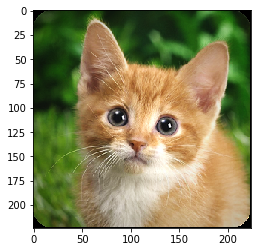

In [7]:
adversarial = attack(image, label, unpack=True)
adversarial_img = adversarial.astype(int)
# print(adversarial)
print(adversarial_img.shape)
print(np.max(adversarial_img))
print(np.min(adversarial_img))
plt.imshow(adversarial_img)

In [8]:
adversarial_in = np.expand_dims(adversarial_img, axis=0)
adversarial_in = preprocess_input(adversarial_in)
fake_pred = model.predict(adversarial_in)
print("Predicted:", decode_predictions(fake_pred, top=3)[0])

Predicted: [('n02127052', 'lynx', 0.1847008), ('n02123045', 'tabby', 0.17589566), ('n02123159', 'tiger_cat', 0.1492931)]


(224, 224, 3)
0
-1


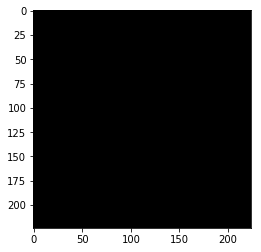

In [9]:
diff = adversarial_img - image
print(diff.shape)
print(np.max(diff))
print(np.min(diff))
plt.imshow(diff)

In [10]:
plot_model(model, to_file='/workspace/simple_demo_model.png', show_shapes=True)

In [11]:
print(model.output.op.inputs[0])

Tensor("fc1000/BiasAdd:0", shape=(?, 1000), dtype=float32)
